<a href="https://colab.research.google.com/github/Gustavo-S-G/MetodoBissec/blob/main/M%C3%A9todoBissec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a função: 
x**3-9*x+3
Digite o Épsilon: 
10**-4
intervalos: [(-4.0, -3.0), (0.0, 1.0), (2.0, 3.0)]
raízes: 
x:     -3.15447998046875; y:   0.000897252074764765
x:      0.33758544921875; y: 0.00020352339993223723
x:      2.81695556640625; y:  0.0006146251455447782


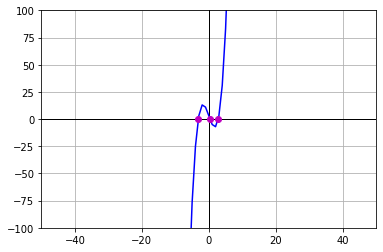

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#input e declaração de var

funStr = input("Digite a função: \n")
epsStr = eval(input("Digite o Épsilon: \n"))
ai = -50
bi = 50
expoente = np.exp
logbase2 = np.log2
logbase10 = np.log10
c = 0
lmt = 1000

#Funções

def raizes_no_intervalo(p: "list[tuple[float, float]]"):
  resto = []
  for i in range(1, len(p)):
        x01, y01 = p[i-1]
        x02, y02 = p[i]
        r = y01 * y02
        if r <= 0:
            if r == 0 and len(resto) > 0 and resto[-1][1] == x01:
                continue
            resto.append((x01, x02))
  return resto

def enc_raiz(f: str, stop: float, a: float, b: float):
    global c
    x01 = a + ((b - a) / 2)

    p = []
    for x in (a, x01, b):
        y = eval(f)

        if y == 0:
            return x, None

        p.append((x, y))

    if abs(x01 - a) < stop or c > lmt:
        return x01, None

    c += 1

    resto = raizes_no_intervalo(p)
    if len(resto) > 1:
        raise ValueError(f'Existe mais de 1 raíz no intervalo [{a}, {b}].')
    return resto[0]

x = np.linspace(ai, bi, abs(ai) + abs(bi) + 1)
y = eval(funStr)

p_coord = list(map(lambda a, b: (a, b), x, y))

intv = [*raizes_no_intervalo(p_coord)]

raizes = []

#Loop
for i, intv2 in enumerate(intv):
    a = intv2[0]
    b = intv2[1]
    c = 0
    while True:
        res = enc_raiz(funStr, epsStr, a, b)
        if res[1] == None:
            raizes.append(res[0])
            break
        a = res[0]
        b = res[1]

#Montagem gráfico
plt.ylim(ai*2, bi*2)
plt.xlim(ai, bi)
plt.grid(True, which='both')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.plot(x, eval(funStr), 'b')

#Printar valor das raizes na tela e no grafico

if raizes:
  print('intervalos:', intv)
  print('raízes: ')
  for x in raizes:
      print('x:', f'{x};'.rjust(22), 
            'y:', f'{eval(funStr)}'.rjust(22))
      plt.plot(x,eval(funStr), 'mo')
else:
  print('Não possui raízes')